In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import f_classif, mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

**Набор данных DDoS-SDN**

In [92]:
data = pd.read_csv("dataset_sdn.csv")
# Определение целевой переменной и признаков
y = data['label']  # Целевая переменная
X = data.drop('label', axis=1)  # Признаки
# Обработка категориальных признаков
X = pd.get_dummies(X, columns=['src', 'dst', 'Protocol'], drop_first=True)

In [93]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
print(f"Обучающая выборка: {X_train_1.shape}, {y_train_1.shape}")
print(f"Тестовая выборка: {X_test_1.shape}, {y_test_1.shape}")

Обучающая выборка: (83476, 56), (83476,)
Тестовая выборка: (20869, 56), (20869,)


In [95]:
# Убираем пропуски
# Заполненяем пропущенные значения средним 
imputer = SimpleImputer(strategy='mean')
X_train_1 = imputer.fit_transform(X_train_1)
X_test_1 = imputer.transform(X_test_1)

In [96]:
logistic_model = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()  

In [97]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

Logistic Regression Accuracy: 0.5960
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 0.9999
K-Nearest Neighbors Accuracy: 0.8912
Naive Bayes Accuracy: 0.6255

 Таблица результатов: 

              Model  Accuracy
Logistic Regression  0.596004
      Decision Tree  1.000000
      Random Forest  0.999856
K-Nearest Neighbors  0.891178
        Naive Bayes  0.625521


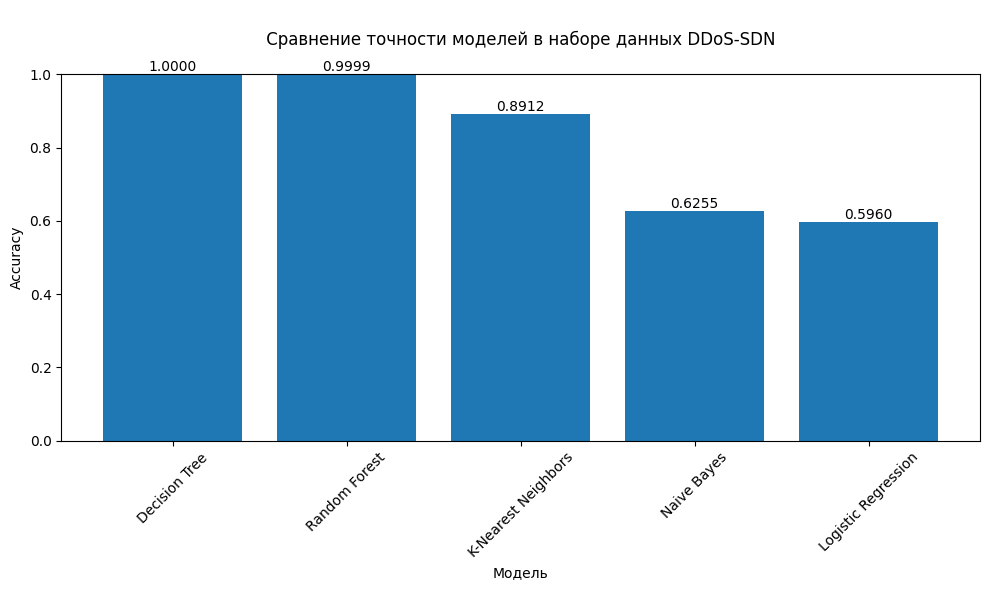

In [ ]:
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "K-Nearest Neighbors": knn,
    "Naive Bayes": naive_bayes,
}

results = []
for model_name, model in models.items():
    accuracy = evaluate_model(model, X_train_1, y_train_1, X_test_1, y_test_1)
    results.append({'Model': model_name, 'Accuracy': accuracy})
    print(f"{model_name} Accuracy: {accuracy:.4f}")

results_df = pd.DataFrame(results)
print("\n Таблица результатов: \n")
print(results_df.to_string(index=False))

results_df = results_df.sort_values('Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['Accuracy'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.title('\n Сравнение точности моделей в наборе данных DDoS-SDN \n')
plt.xlabel('Модель')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Ограничиваем шкалу accuracy от 0 до 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
target_column = "label"
unique_classes = data[target_column].unique()
print(f"Уникальные классы: {unique_classes}")
print(f"Количество классов: {len(unique_classes)}")

Уникальные классы: [0 1]
Количество классов: 2


    Нормировка

In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_1)
X_test = scaler.transform(X_test_1)

In [ ]:
results = []
reports = []

for model_name, model in models.items():
    model.fit(X_train, y_train_1)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_1, y_pred)
    
    report = classification_report(y_test_1, y_pred, output_dict=True)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision (weighted)': report['weighted avg']['precision'],
        'Recall (weighted)': report['weighted avg']['recall'],
        'F1-score (weighted)': report['weighted avg']['f1-score']
    })
    
    reports.append(report)
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_1, y_pred))



Random Forest Performance:
Accuracy: 0.9998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12722
           1       1.00      1.00      1.00      8147

    accuracy                           1.00     20869
   macro avg       1.00      1.00      1.00     20869
weighted avg       1.00      1.00      1.00     20869


K-Nearest Neighbors Performance:
Accuracy: 0.9783
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12722
           1       0.98      0.97      0.97      8147

    accuracy                           0.98     20869
   macro avg       0.98      0.98      0.98     20869
weighted avg       0.98      0.98      0.98     20869


Naive Bayes Performance:
Accuracy: 0.6179
              precision    recall  f1-score   support

           0       0.84      0.46      0.60     12722
           1       0.51      0.86      0.64      8147

    accuracy                           0.62

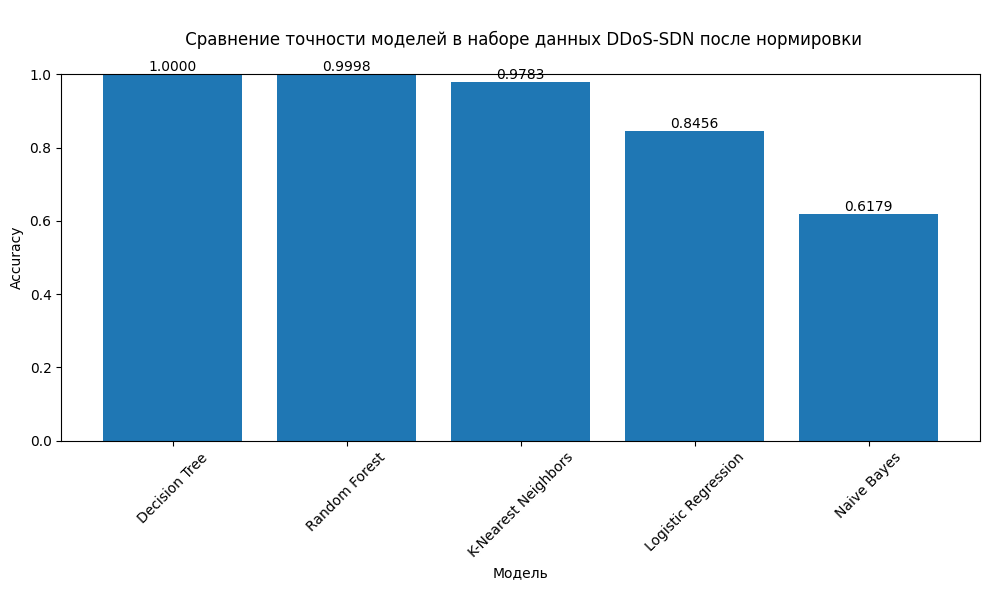

In [ ]:
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['Accuracy'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.title('\n Сравнение точности моделей в наборе данных DDoS-SDN после нормировки\n')
plt.xlabel('Модель')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Набор данных InSDN**

In [103]:
df_normal = pd.read_csv("Normal_data.csv")
df_metasploitable = pd.read_csv("metasploitable-2.csv")
df_OVS = pd.read_csv("OVS.csv")

In [ ]:
df_combined = pd.concat([df_normal, df_metasploitable, df_OVS], axis=0, ignore_index=True)

print(df_combined.head())
print(f"Общее количество строк: {len(df_combined)}")

                                    Flow ID          Src IP  Src Port  \
0  185.127.17.56-192.168.20.133-443-53648-6   185.127.17.56       443   
1  185.127.17.56-192.168.20.133-443-53650-6  192.168.20.133     53650   
2    192.168.20.133-192.168.20.2-35108-53-6  192.168.20.133     35108   
3    192.168.20.133-192.168.20.2-35108-53-6    192.168.20.2        53   
4  154.59.122.74-192.168.20.133-443-60900-6  192.168.20.133     60900   

           Dst IP  Dst Port  Protocol       Timestamp  Flow Duration  \
0  192.168.20.133     53648         6  5/2/2020 13:58         245230   
1   185.127.17.56       443         6  5/2/2020 13:58        1605449   
2    192.168.20.2        53         6  5/2/2020 13:58          53078   
3  192.168.20.133     35108         6  5/2/2020 13:58           6975   
4   154.59.122.74       443         6  5/2/2020 13:58         190141   

   Tot Fwd Pkts  Tot Bwd Pkts  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0            44            40  ...             

In [ ]:
X = df_combined.drop(columns=["Label"])
y = df_combined["Label"]

In [106]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train_2)
X_test_encoded = encoder.transform(X_test_2)

In [108]:
print(f"Обучающая выборка: {X_train.shape}, {y_train_2.shape}")
print(f"Тестовая выборка: {X_test.shape}, {y_test_2.shape}")

Обучающая выборка: (83476, 56), (275111,)
Тестовая выборка: (20869, 56), (68778,)


In [109]:
target_column = "Label"
unique_classes = df_combined[target_column].unique()
print(f"Уникальные классы: {unique_classes}")
print(f"Количество классов: {len(unique_classes)}")

Уникальные классы: ['Normal' 'U2R' 'BFA' 'DDoS' 'DoS' 'Probe' 'DDoS ' 'Web-Attack' 'BOTNET']
Количество классов: 9


    Замена категориального признака на 4 колонки

In [ ]:
#IP
df_combined['Dst ip_part1'] = df_combined['Dst IP'].apply(lambda x: int(x.split('.')[0]))
df_combined['Dst ip_part2'] = df_combined['Dst IP'].apply(lambda x: int(x.split('.')[1]))
df_combined['Dst ip_part3'] = df_combined['Dst IP'].apply(lambda x: int(x.split('.')[2]))
df_combined['Dst ip_part4'] = df_combined['Dst IP'].apply(lambda x: int(x.split('.')[3]))

# Удаление исходной колонки с IP-адресами
df_combined = df_combined.drop(columns=['Dst IP'])

In [ ]:
df_combined['Src ip_part1'] = df_combined['Src IP'].apply(lambda x: int(x.split('.')[0]))
df_combined['Src ip_part2'] = df_combined['Src IP'].apply(lambda x: int(x.split('.')[1]))
df_combined['Src ip_part3'] = df_combined['Src IP'].apply(lambda x: int(x.split('.')[2]))
df_combined['Src ip_part4'] = df_combined['Src IP'].apply(lambda x: int(x.split('.')[3]))

df_combined = df_combined.drop(columns=['Src IP'])

In [112]:
df_combined['Flow_ID_Part1'] = df_combined['Flow ID'].apply(lambda x: int(x.split('.')[1]))
df_combined = df_combined.drop(columns=['Flow ID'])

In [113]:
# Преобразование Timestamp в datetime
df_combined['Timestamp'] = pd.to_datetime(df_combined['Timestamp'], format='mixed')
# Извлечение полезных признаков
df_combined['Year'] = df_combined['Timestamp'].dt.year
df_combined['Month'] = df_combined['Timestamp'].dt.month
df_combined['Day'] = df_combined['Timestamp'].dt.day
df_combined['Hour'] = df_combined['Timestamp'].dt.hour
df_combined['Minute'] = df_combined['Timestamp'].dt.minute
df_combined['Second'] = df_combined['Timestamp'].dt.second
df_combined['DayOfWeek'] = df_combined['Timestamp'].dt.dayofweek  # День недели (0 - понедельник, 6 - воскресенье)
# Удаление исходной колонки Timestamp
df_combined = df_combined.drop(columns=['Timestamp'])

In [114]:
print(df_combined.dtypes)

Src Port         int64
Dst Port         int64
Protocol         int64
Flow Duration    int64
Tot Fwd Pkts     int64
                 ...  
Day              int32
Hour             int32
Minute           int32
Second           int32
DayOfWeek        int32
Length: 96, dtype: object


In [ ]:
X = df_combined.drop(columns=["Label"])
y = df_combined["Label"]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=1000)  # Для многоклассовой классификации
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "K-Nearest Neighbors": knn,
    "Naive Bayes": naive_bayes
}

results = []
for model_name, model in models.items():
    accuracy = evaluate_model(model, X_train_2, y_train_2, X_test_2, y_test_2)
    results.append({'Model': model_name, 'Accuracy': accuracy})
    print(f"{model_name} Accuracy: {accuracy:.4f}")

results_df = pd.DataFrame(results)

results_df = results_df.sort_values('Accuracy', ascending=False)

In [118]:
print("\n Таблица результатов в наборе данных InSDN:\n")
print(results_df.to_string(index=False))


 Таблица результатов в наборе данных InSDN:

              Model  Accuracy
      Decision Tree  0.999942
      Random Forest  0.999942
K-Nearest Neighbors  0.993806
Logistic Regression  0.664122
        Naive Bayes  0.308282


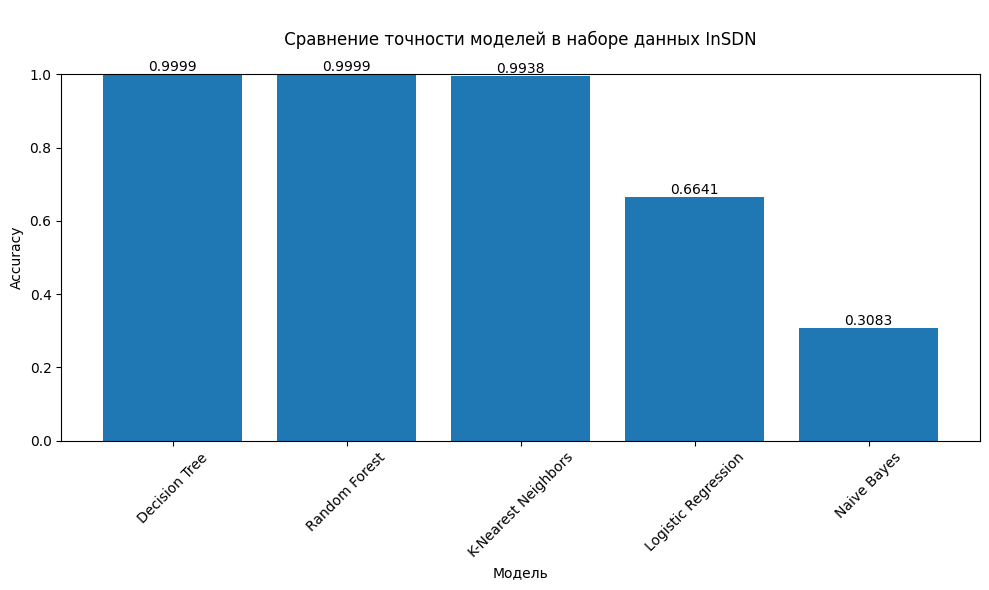

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['Accuracy'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.title('\n Сравнение точности моделей в наборе данных InSDN \n')
plt.xlabel('Модель')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  # Ограничиваем шкалу accuracy от 0 до 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    Нормировка

In [120]:
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [ ]:
results = []
reports = []

for model_name, model in models.items():
    model.fit(X_train_2, y_train_2)
    y_pred = model.predict(X_test_2)
    accuracy = accuracy_score(y_test_2, y_pred)
    
    report = classification_report(y_test_2, y_pred, output_dict=True)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision (weighted)': report['weighted avg']['precision'],
        'Recall (weighted)': report['weighted avg']['recall'],
        'F1-score (weighted)': report['weighted avg']['f1-score']
    })
    
    reports.append(report)
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_2, y_pred))

results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)

              precision    recall  f1-score   support

         BFA       1.00      1.00      1.00       260
      BOTNET       1.00      1.00      1.00        27
        DDoS       1.00      0.99      1.00     14702
       DDoS        1.00      1.00      1.00      9747
         DoS       0.99      0.75      0.85     10628
      Normal       0.98      1.00      0.99     13677
       Probe       0.89      0.99      0.94     19695
         U2R       0.67      0.50      0.57         4
  Web-Attack       1.00      0.95      0.97        38

    accuracy                           0.96     68778
   macro avg       0.95      0.91      0.92     68778
weighted avg       0.96      0.96      0.96     68778



In [ ]:
print("Сводная таблица производительности моделей в наборе данных InSDN:")
print(results_df.to_string(index=False))

results_df.to_csv('models_performance_insdn_normal.csv', index=False)

Сводная таблица производительности моделей в наборе данных InSDN:
              Model  Accuracy  Precision (weighted)  Recall (weighted)  F1-score (weighted)
      Decision Tree  0.999927              0.999870           0.999927             0.999898
      Random Forest  0.999927              0.999927           0.999927             0.999927
Logistic Regression  0.999811              0.999753           0.999811             0.999782
K-Nearest Neighbors  0.999462              0.999404           0.999462             0.999433
        Naive Bayes  0.957763              0.961565           0.957763             0.956053


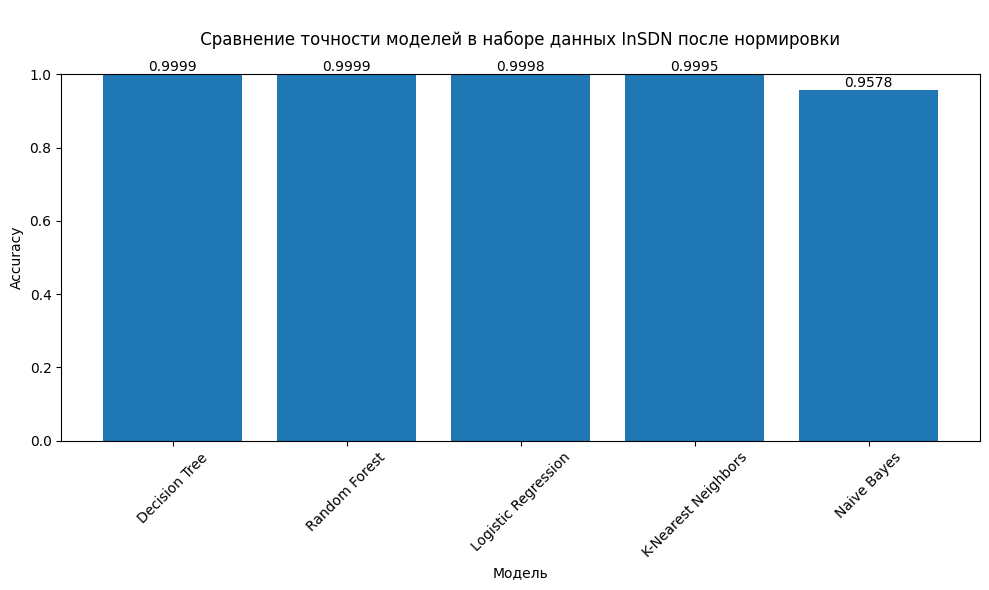

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['Accuracy'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.title('\n Сравнение точности моделей в наборе данных InSDN после нормировки \n')
plt.xlabel('Модель')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [124]:
feature_names_2 = [
    'Flow_ID_Part1',
    'Src ip_part1',
    'Src ip_part2',
    'Src ip_part3',
    'Src ip_part4',
    'Src Port',
    'Dst ip_part1',
    'Dst ip_part2',
    'Dst ip_part3',
    'Dst ip_part4',
    'Dst Port',
    'Protocol',
    'Year',
    'Month',
    'Day',
    'Hour',
    'Minute',
    'Second',
    'DayOfWeek',
    'Flow Duration',
    'Tot Fwd Pkts',
    'Tot Bwd Pkts',
    'TotLen Fwd Pkts',
    'TotLen Bwd Pkts',
    'Fwd Pkt Len Max',
    'Fwd Pkt Len Min',
    'Fwd Pkt Len Mean',
    'Fwd Pkt Len Std',
    'Bwd Pkt Len Max',
    'Bwd Pkt Len Min',
    'Bwd Pkt Len Mean',
    'Bwd Pkt Len Std',
    'Flow Byts/s',
    'Flow Pkts/s',
    'Flow IAT Mean',
    'Flow IAT Std',
    'Flow IAT Max',
    'Flow IAT Min',
    'Fwd IAT Tot',
    'Fwd IAT Mean',
    'Fwd IAT Std',
    'Fwd IAT Max',
    'Fwd IAT Min',
    'Bwd IAT Tot',
    'Bwd IAT Mean',
    'Bwd IAT Std',
    'Bwd IAT Max',
    'Bwd IAT Min',
    'Fwd PSH Flags',
    'Bwd PSH Flags',
    'Fwd URG Flags',
    'Bwd URG Flags',
    'Fwd Header Len',
    'Bwd Header Len',
    'Fwd Pkts/s',
    'Bwd Pkts/s',
    'Pkt Len Min',
    'Pkt Len Max',
    'Pkt Len Mean',
    'Pkt Len Std',
    'Pkt Len Var',
    'FIN Flag Cnt',
    'SYN Flag Cnt',
    'RST Flag Cnt',
    'PSH Flag Cnt',
    'ACK Flag Cnt',
    'URG Flag Cnt',
    'CWE Flag Count',
    'ECE Flag Cnt',
    'Down/Up Ratio',
    'Pkt Size Avg',
    'Fwd Seg Size Avg',
    'Bwd Seg Size Avg',
    'Fwd Byts/b Avg',
    'Fwd Pkts/b Avg',
    'Fwd Blk Rate Avg',
    'Bwd Byts/b Avg',
    'Bwd Pkts/b Avg',
    'Bwd Blk Rate Avg',
    'Subflow Fwd Pkts',
    'Subflow Fwd Byts',
    'Subflow Bwd Pkts',
    'Subflow Bwd Byts',
    'Init Fwd Win Byts',
    'Init Bwd Win Byts',
    'Fwd Act Data Pkts',
    'Fwd Seg Size Min',
    'Active Mean',
    'Active Std',
    'Active Max',
    'Active Min',
    'Idle Mean',
    'Idle Std',
    'Idle Max',
    'Idle Min'
]

In [ ]:
def check_best_features(X_train, y_train, feature_names):
    # Важность признаков через Logistic Regression
    logistic_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    logistic_model.fit(X_train, y_train)

    # Коэффициенты (усредняем по всем классам)
    logistic_importance = np.mean(np.abs(logistic_model.coef_), axis=0)

    # Важность признаков через Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_importance = rf_model.feature_importances_

    # ANOVA F-value
    f_values, _ = f_classif(X_train, y_train)

    # Mutual Information
    mutual_info = mutual_info_classif(X_train, y_train)

    # Создаем DataFrame для сравнения
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Logistic_Reg_Importance': logistic_importance,
        'RF_Importance': rf_importance,
        'ANOVA_F_Value': f_values,
        'Mutual_Info': mutual_info
    })

    # Нормализуем значения для сравнения
    for col in ['Logistic_Reg_Importance', 'RF_Importance', 'ANOVA_F_Value', 'Mutual_Info']:
        if feature_importance_df[col].max() > 0:
            feature_importance_df[f'{col}_Norm'] = (
                feature_importance_df[col] / feature_importance_df[col].max()
            )
        else:
            feature_importance_df[f'{col}_Norm'] = 0

    # Усредняем важность (только нормализованные значения)
    norm_columns = [col for col in feature_importance_df.columns if '_Norm' in col]
    feature_importance_df['Overall_Importance'] = feature_importance_df[norm_columns].mean(axis=1)

    feature_importance_df = feature_importance_df.sort_values('Overall_Importance', ascending=False)

    # Выбираем топ-10 признаков
    top_features = feature_importance_df['Feature'].head(10).tolist()
    print("Top 10 features:", top_features)
    return feature_importance_df

In [133]:
def figure_best_feature(feature_importance_df):
    plt.figure(figsize=(14, 16))
    ax = plt.subplot()
    sorted_df = feature_importance_df.sort_values('Overall_Importance', ascending=True)

    bars = ax.barh(sorted_df['Feature'], 
                sorted_df['Overall_Importance'],
                height=0.8)

    plt.rcParams['font.size'] = 10

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01,
                bar.get_y() + bar.get_height()/2,
                f'{width:.3f}',
                va='center',
                ha='left')

    ax.set_xlabel('Normalized Importance Score', fontsize=12)
    ax.set_title('Feature Importance Comparison', fontsize=14, pad=20)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [ ]:
feature_importance_df = check_best_features(X_train_2, y_train_2, feature_names_2)

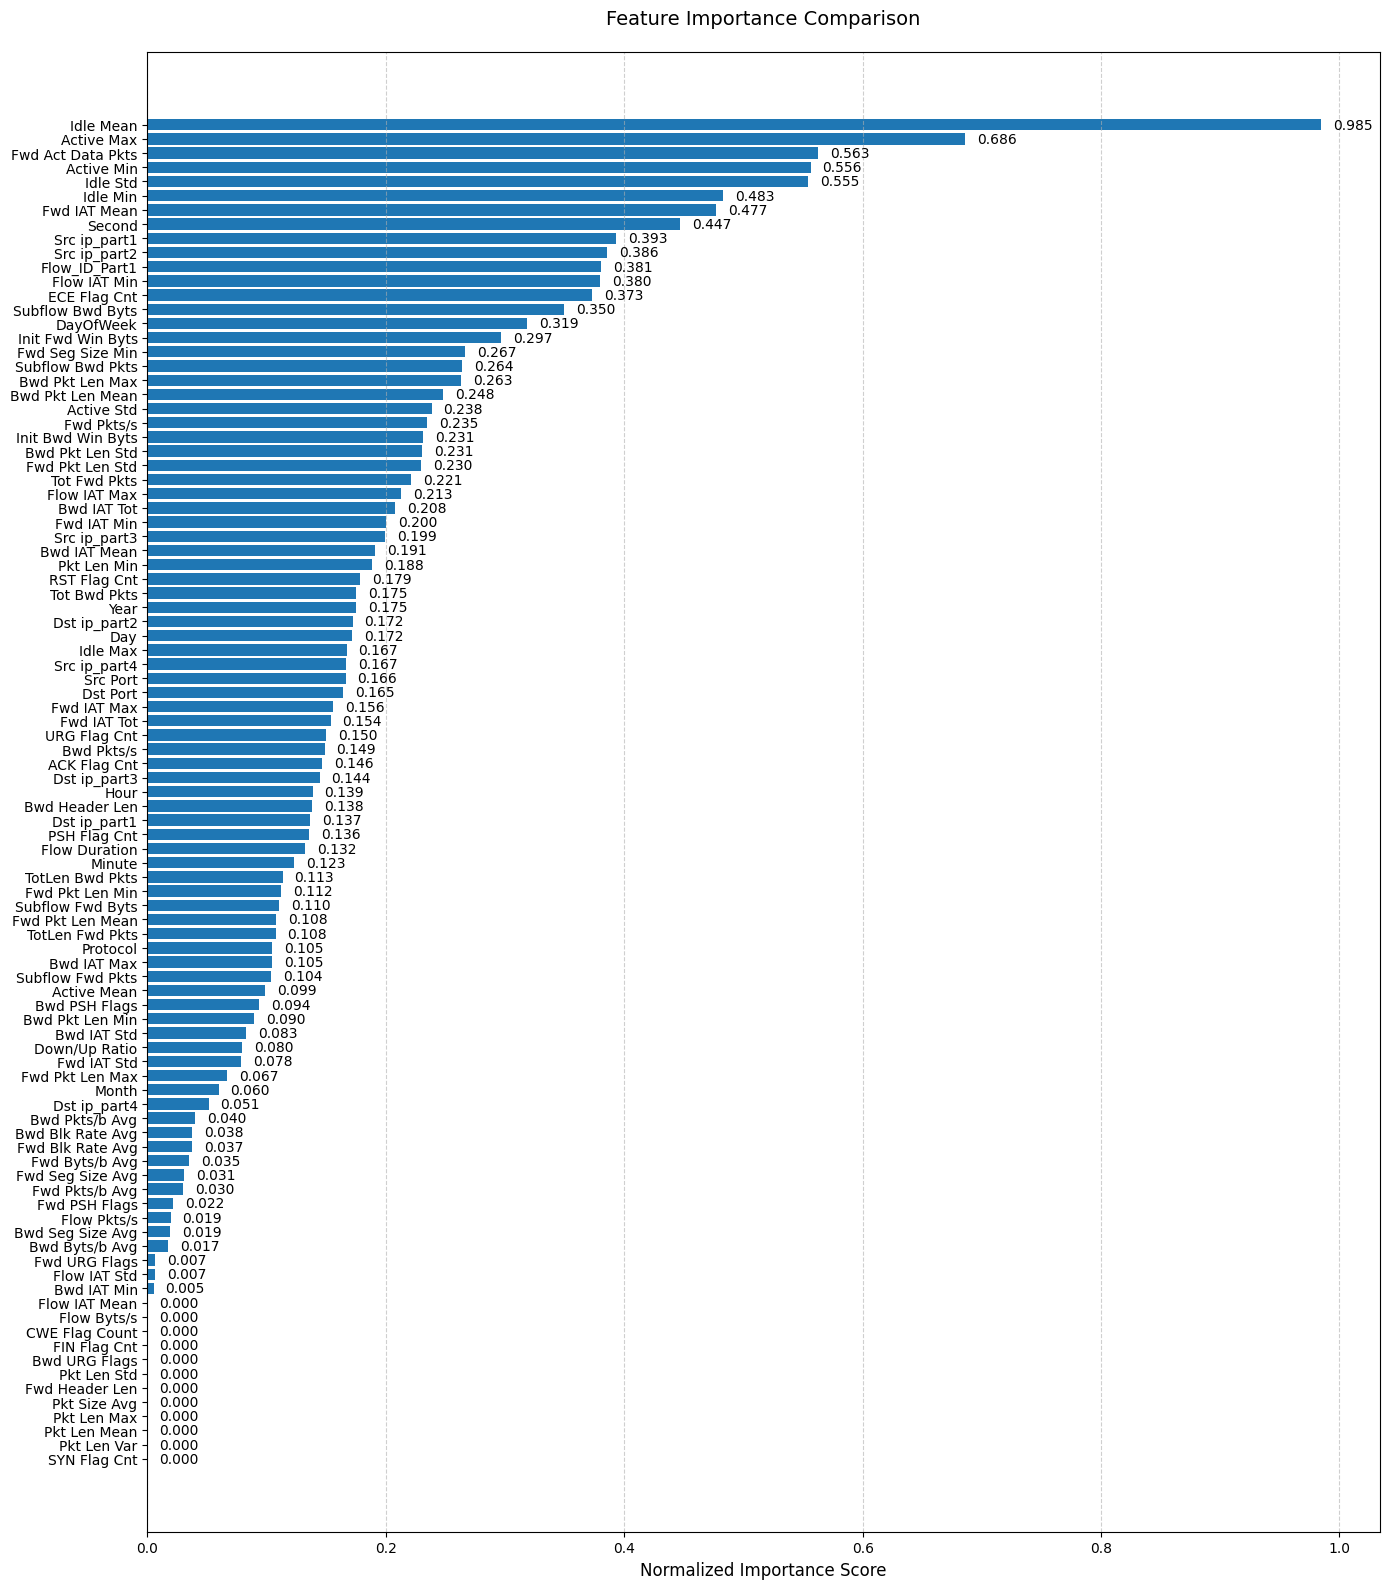

In [134]:
figure_best_feature(feature_importance_df)

In [ ]:
def check_best_features_binary(X_train, y_train, feature_names):    
    # Важность признаков через Logistic Regression (бинарная классификация)
    logistic_model = LogisticRegression(max_iter=1000)
    logistic_model.fit(X_train, y_train)
    logistic_importance = np.abs(logistic_model.coef_[0])
    
    # Важность признаков через Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_importance = rf_model.feature_importances_

    # ANOVA F-value
    f_values, _ = f_classif(X_train, y_train)

    # Проверка размерностей
    assert len(logistic_importance) == len(rf_importance) == len(f_values)  == len(feature_names), \
        f"Размеры не совпадают: logistic={len(logistic_importance)}, rf={len(rf_importance)}, f={len(f_values)},  names={len(feature_names)}"

    # Создаем DataFrame для сравнения
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Logistic_Reg_Importance': logistic_importance,
        'RF_Importance': rf_importance,
        'ANOVA_F_Value': f_values
    })

    # Нормализуем значения для сравнения
    for col in ['Logistic_Reg_Importance', 'RF_Importance', 'ANOVA_F_Value']:
        if feature_importance_df[col].max() > 0:
            feature_importance_df[f'{col}_Norm'] = (
                feature_importance_df[col] / feature_importance_df[col].max()
            )
        else:
            feature_importance_df[f'{col}_Norm'] = 0

    # Усредняем важность
    norm_columns = [col for col in feature_importance_df.columns if '_Norm' in col]
    feature_importance_df['Overall_Importance'] = feature_importance_df[norm_columns].mean(axis=1)

    # Сортируем по важности
    feature_importance_df = feature_importance_df.sort_values('Overall_Importance', ascending=False)

    # Выбираем топ-10 признаков
    top_features = feature_importance_df['Feature'].head(10).tolist()
    print("Top 10 features:", top_features)
    
    return feature_importance_df

In [151]:
feature_names_1 =[
    'dt', 
    'switch', 
    'pktcount', 
    'bytecount', 
    'dur', 
    'dur_nsec', 
    'tot_dur',
    'flows', 
    'packetins', 
    'pktperflow', 
    'byteperflow', 
    'pktrate',
    'Pairflow', 
    'port_no', 
    'tx_bytes', 
    'rx_bytes', 
    'tx_kbps', 
    'rx_kbps',
    'tot_kbps',
    'src', 
    'dst', 
    'Protocol'
]

In [155]:
X_train_1 = X_train_1[:, :22]

In [160]:
feature_importance_df = check_best_features_binary(X_train_1, y_train_1, feature_names_1)

Top 10 features: ['bytecount', 'pktcount', 'pktperflow', 'byteperflow', 'pktrate', 'packetins', 'src', 'tot_dur', 'dt', 'dur']


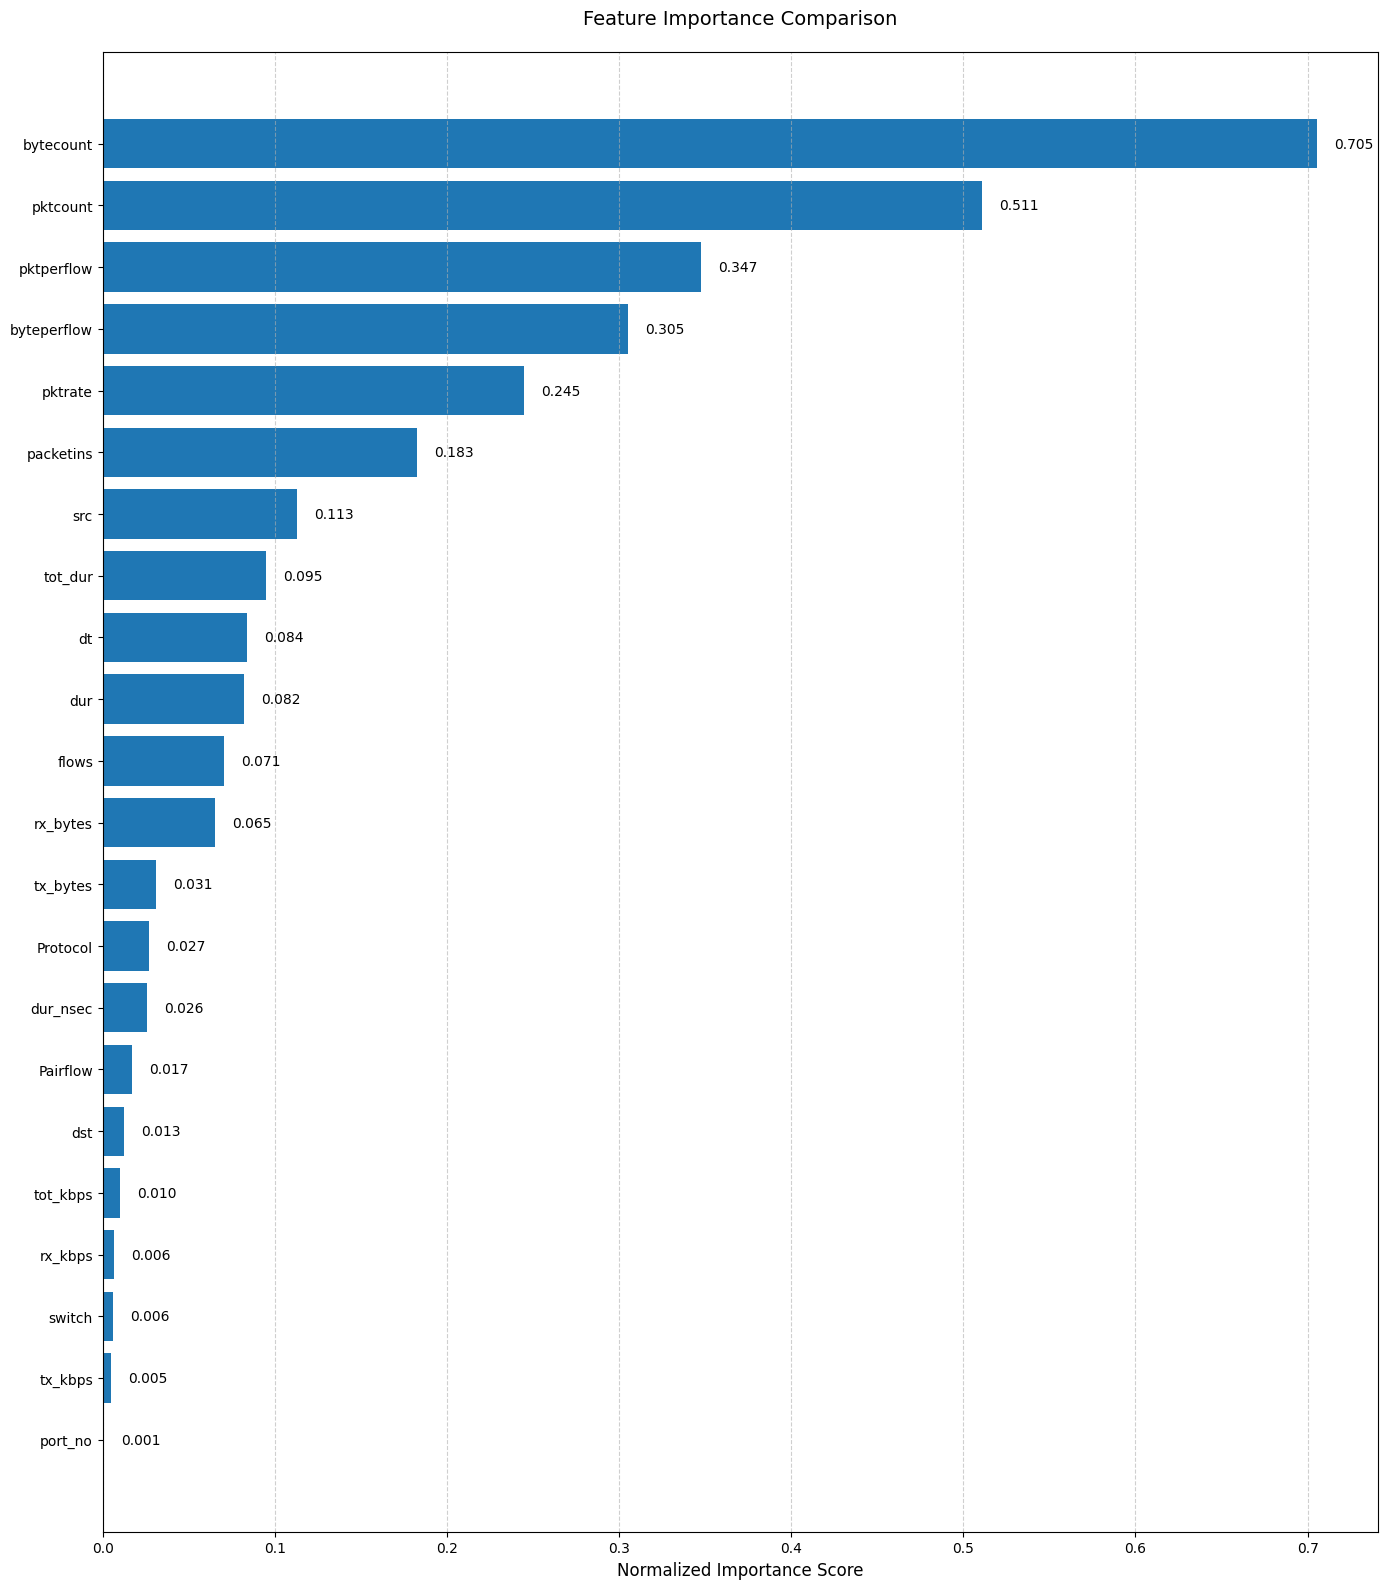

In [161]:
figure_best_feature(feature_importance_df)

    SVC

In [8]:
from sklearn.svm import SVC

1. InSDN

In [163]:
model = SVC(kernel='linear')
model.fit(X_train_2, y_train_2)
y_pred = model.predict(X_test_2)
accuracy = accuracy_score(y_test_2, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9999127628020588


2. DDoS-SDN

In [ ]:
data = pd.read_csv("dataset_sdn.csv")
y = data['label']
X = data.drop('label', axis=1)
X = pd.get_dummies(X, columns=['src', 'dst', 'Protocol'], drop_first=True)

In [4]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
imputer = SimpleImputer(strategy='mean')
X_train_1 = imputer.fit_transform(X_train_1)
X_test_1 = imputer.transform(X_test_1)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

svc = SVC().fit(X_train_scaled, y_train_1)

In [10]:
y_pred = svc.predict(X_test_1)
accuracy = accuracy_score(y_test_1, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.390387656332359


Медленная работа, на больших датасетах

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train_scaled, y_train_1)
print(f"Лучшие параметры: {grid.best_params_}")